In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline, CubicHermiteSpline
from scipy.integrate import quad,fixed_quad,dblquad
import sympy as sp
from scipy.integrate import trapezoid
from scipy.integrate import simpson 

# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Miguel Angel Perdomo Gaitan
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

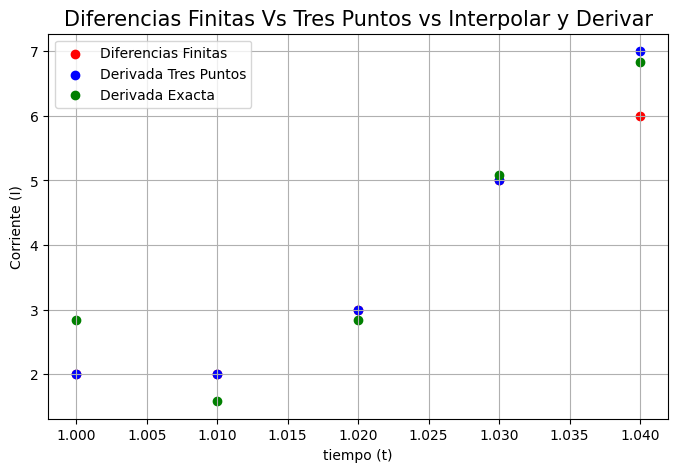

In [2]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo (s)
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente (Amperios)
#se crea el DataFrame
d={"Corriente":[3.10, 3.12, 3.14, 3.18, 3.24],"Tiempo":[1.00, 1.01, 1.02, 1.03, 1.04]}
dataframe=pd.DataFrame(d)
def Diferencias_Finitas(f, x):
    """
    Calcula la derivada usando diferencias finitas.

    Entradas:
    f: Valores de la función evaluada en x (array de numpy)
    x: Puntos en los que se evaluó la función (array de numpy)

    Salida:
    Array con los valores de la derivada de f en los puntos x
    """
    # Se determina la cantidad de elementos
    n = len(x)
    n_f = len(f)
    # Verificación de tamaño
    if n_f != n:
        raise ValueError("f y x deben tener el mismo tamaño")
    # Verificación de espaciamiento uniforme
    diferencias = np.diff(x)
    if not np.all(diferencias == diferencias[0]):
        raise ValueError("Los elementos de x no están igualmente espaciados")
    # Paso de discretización
    h = diferencias[0]
    # Inicialización del array de derivadas
    fprime = np.zeros_like(x, dtype="float")
    # Aplicación de fórmulas de diferencia finita
    for i in range(n):
        if i == 0:
            # Diferencia hacia adelante
            fprime[i] = (f[i+1] - f[i]) / h
        elif i == n - 1:
            # Diferencia hacia atrás
            fprime[i] = (f[i] - f[i-1]) / h
        else:
            # Diferencia centrada
            fprime[i] = (f[i+1] - f[i-1]) / (2*h)
    return fprime
def tres_puntos (f,x):
    """
    Implementa el método de tres puntos para determinar la derivada
    Entradas:
    f: función (array de numpy)
    x: valores a derivar (array de numpy)
    Salida:
    retorna un array de numpy con la derivada en cada punto
    """
    #numero de elementos
    n=len(x)
    if n!=len(f):
        raise ValueError("f y x deben tener la misma cantidad de elementos")
    #verificar que x tiene al menos 3 elementos
    if n<3:
        raise ValueError("x debe tener al menos tres elementos")
    #verificación de que los x estén igualmente espaciados
    diferencias=np.diff(x) #array con las diferencias entre los elementos
    if not np.all(diferencias==diferencias[0]):
        raise ValueError("los elementos de x no están igualmente espaciados")
    #paso de discretización
    h=x[1]-x[0]
    #array donde se guardará la derivada
    fprime=np.zeros_like(x,dtype="float")
    #se inicaliza el ciclo for para determinar la derivada
    for i in range(n):
        if i==0:
            #derivada adelantada
            fprime[i]=(-3*f[i]+4*f[i+1]-f[i+2])/(2*h)
        elif i==n-1:
            #derivada atrazada
            fprime[i]=(3*f[i]-4*f[i-1]+f[i-2])/(2*h)
        else:
            fprime[i]=(f[i+1]-f[i-1])/(2*h)
    return fprime
#se determina la derivada numérica usando ambos métodos
derivada_diferencias_finitas=Diferencias_Finitas(i,t)
derivada_tres_puntos=tres_puntos(i,t)
#se interpola usando CubicSpline
poly_interp=CubicSpline(t,i)
#se evalua la derivada del polinomio interpolador en los puntos dados
derivada_exacta=poly_interp(t,nu=1)
#comparar resultados
plt.figure(figsize=(8,5))
plt.scatter(t,derivada_diferencias_finitas,label="Diferencias Finitas",color="red")
plt.scatter(t,derivada_tres_puntos,label="Derivada Tres Puntos", color="blue")
plt.scatter(t,derivada_exacta, label="Derivada Exacta",color="green")
plt.title("Diferencias Finitas Vs Tres Puntos vs Interpolar y Derivar",fontsize=15)
plt.xlabel("tiempo (t)", fontsize=10)
plt.ylabel("Corriente (I)",fontsize=10)
plt.legend()
plt.grid()
plt.show()

# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [3]:
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
#se deriva usando gradient
derivada=np.gradient(x,t)
#se imprime la velocidad en cada punto
print(derivada)
#interpolo las velocidades
poly_interp=CubicSpline(t,derivada)
print(f"La velocidad para t=12 es {poly_interp(12):.2f} m/s")

[75.         77.4        79.4        67.7        69.16666667 83.66666667]
La velocidad para t=12 es 78.30 m/s


# 3.
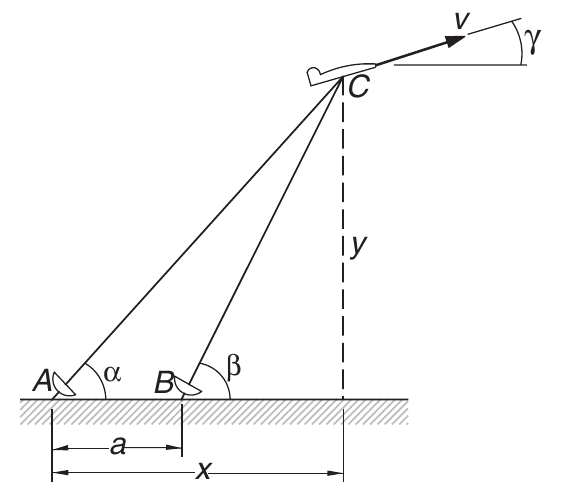


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [4]:
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]}

df = pd.DataFrame(data) 
a= 500 #metros
desplazamiento_x=[] #lista vacía donde se guardarán el desplazamiento en x
desplazamiento_y=[] #lista vacía donde se guardarán el desplazamiento en y
#se determina el desplazamiento en x
for alpha,beta in zip(df["alpha (°)"],df["beta (°)"]):
    #se pasan los ángulos a radianes
    alpha_rad=alpha*(np.pi/180)
    beta_rad=beta*(np.pi/180)
    #se determina la posición
    x=a*(np.tan(beta_rad)/(np.tan(beta_rad)-np.tan(alpha_rad)))
    y=a*(np.tan(beta_rad)*np.tan(beta_rad)/(np.tan(beta_rad)-np.tan(alpha_rad)))
    #se guarda la posición en las listas
    desplazamiento_x.append(x)
    desplazamiento_y.append(y)
#se convierten las listas en arrays de numyp
desplazamiento_x_np=np.array(desplazamiento_x)
desplazamiento_y_np=np.array(desplazamiento_y)
#tiempo como array
tiempo=np.array(df["t (s)"])
#se determina la derivada en cada punto 
velocidad_x=np.gradient(desplazamiento_x_np,tiempo)
velocidad_y=np.gradient(desplazamiento_y_np,tiempo)
#como t=10 tiene asignado el índice 1, se determina la magnitud de la velocidad en ese punto
v_x_10=velocidad_x[1]
v_y_10=velocidad_y[1]
magnitud_v_10=magnitud_v_10=np.sqrt(v_x_10**2 + v_y_10**2)
#se encuentra el ángulo
angulo=np.arctan2(v_y_10,v_x_10)
#se pasa a grados
angulo_grad=angulo*(180/np.pi)
#se imprimen los resultados
print(f"La magnitud de v= {magnitud_v_10:.2f} m/s con un ángulo de: {angulo_grad:.2f}°")

La magnitud de v= 58.96 m/s con un ángulo de: -34.89°


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [18]:
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
#se interpolan los datos usando CubicSpline
poly_interp=CubicSpline(t,v)
#se integra para determinar el desplazamiento
a=0 #límite inferior
b=28 #límite superior
integral,error=quad(poly_interp,a,b) #determinar integral
#se imprime el valor de la integral
print(f"El objeto viaja desde t=0 s hasta t=28 s {integral:.2f} metros")
#se determina la aceleración
aceleracion=np.gradient(v,t)
#la aceleración en t=28 seg está en el índice 7
print(f"La aceleración en t=28 s es {aceleracion[7]:.2f} m/s^2")

El objeto viaja desde t=0 s hasta t=28 s 2319.71 metros
La aceleración en t=28 s es 1.72 m/s^2


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [30]:
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
#se determina As
As=-np.gradient(V[::-1],z[::-1]) #fórmula dada (se invierte porque CubicSpline solo acepta arrays en orden creciente
#se interpola lo anterior para encontrar As(z)
As_z=CubicSpline(z,As)
#se determina Vt
a=0 #límite inferior
b=Z #límite superior
Vt,error=quad(As_z,a,b) 
#se interpola c(z)
c_z=CubicSpline(z,c)
c_z_y_As=lambda z:c_z(z)*As_z(z)#declaración función producto entre As(z)*c(z)
#se integral c_z_y_As
integral_producto,error1=quad(c_z_y_As,a,b) 
c=integral_producto/Vt
print(f"La concentración promedio es: {c:.2f} g/m³")

La concentración promedio es: 5.87 g/m³


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [34]:
#función que se va a integral
funcion_integrar=lambda r: ((r**2)*((2-r)**2)*(np.exp(-r)))
#declaración del incremento
incremento=np.arange(10,26)
#tolerancia
tol=1e-6
#n distintos
n=np.arange(1,100000,10)
#ciclos for para integral con cada incremento
#con trapezoid
for ri in incremento:
    #se emplea quad para determinar el valor real
    integral,__=quad(funcion_integrar,0,ri)
    integral_real=(1/8)*integral #se multiplica por 1/8
    for ni in n:
        x=np.linspace(0,ri,ni)
        y=funcion_integrar(x)
        #se determina la integral con trapezoid
        integral_trape=(1/8)*trapezoid(y,x)
        #se determina el error
        error_t=abs(integral_real-integral_trape)
        #se condiciona el error
        if error_t<tol:
            print(f"la probabilidad en r={ri} es:{integral_trape} usando trapezoid")
            break
 #ahora con cuadratura
for ri in incremento:
    #se emplea quad para determinar el valor real
    integral,__=quad(funcion_integrar,0,ri)
    integral_real=(1/8)*integral #se multiplica por 1/8
    for ni in n:
        #se hace un arreglo de x con ni subdivisiones
        x=np.linspace(0,ri,ni)
        y=funcion_integrar(x) #se x evalua en la función 
        #se varía ni para mejorar la precisión y llegar a la tolerancia deseada
        integral_fixed,_=fixed_quad(funcion_integrar,0,ri,n=ni) 
        integral_fixed_18=integral_fixed*(1/8) #se multplica por 1/8
        error_f=abs(integral_real-integral_fixed_18)
        if error_f<tol:
            print(f"la probabilidad en r={ri} es: {integral_fixed_18} usando cuadratura")
            break
#ahora con simpson
for ri in incremento:
    #se emplea quad para determinar el valor real
    integral,__=quad(funcion_integrar,0,ri)
    integral_real=(1/8)*integral #se multiplica por 1/8
    for ni in n:
        if ni%2==0: #simpson requiere un númera impar de x
            ni+=1 #se suma uno para que ni siempre sea impar
        #se determina un nuevo x y f(x) (impar)
        x_nuevo=np.linspace(0,ri,ni)
        y_nuevo=funcion_integrar(x_nuevo)
        integral_simpson=(1/8)*simpson(y_nuevo,x_nuevo) 
        error_s=abs(integral_real-integral_simpson)
        if error_s<tol:
            print(f"la probabilidad en r={ri} es: {integral_simpson} usando simpson")
            break

la probabilidad en r=10 es:0.9404796988519275 usando trapezoid
la probabilidad en r=11 es:0.9682219705131114 usando trapezoid
la probabilidad en r=12 es:0.983550988291187 usando trapezoid
la probabilidad en r=13 es:0.9917067732468696 usando trapezoid
la probabilidad en r=14 es:0.9959121216946364 usando trapezoid
la probabilidad en r=15 es:0.9980240418600357 usando trapezoid
la probabilidad en r=16 es:0.999060934665821 usando trapezoid
la probabilidad en r=17 es:0.9995602088676263 usando trapezoid
la probabilidad en r=18 es:0.9997964635541665 usando trapezoid
la probabilidad en r=19 es:0.9999067275567917 usando trapezoid
la probabilidad en r=20 es:0.9999574679470045 usando trapezoid
la probabilidad en r=21 es:0.9999805412549965 usando trapezoid
la probabilidad en r=22 es:0.9999909218911602 usando trapezoid
la probabilidad en r=23 es:0.9999953854237401 usando trapezoid
la probabilidad en r=24 es:0.999997435930059 usando trapezoid
la probabilidad en r=25 es:0.999998337918879 usando trapez

In [36]:
#se determina la integral de 0 a infinito
#límite de integración
a=0
b=np.inf
integral,error=quad(funcion_integrar, a,b)
#se multiplica por 1/8
integral_probabilidad=(1/8)*integral
print(f"la probabilidad de encontrar el electrón entre 0 y infinito es: {integral_probabilidad}")

la probabilidad de encontrar el electrón entre 0 y infinito es: 1.0


Efectivamente, la probabilidad de encontran al electrón en el espacio es del 100%

# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

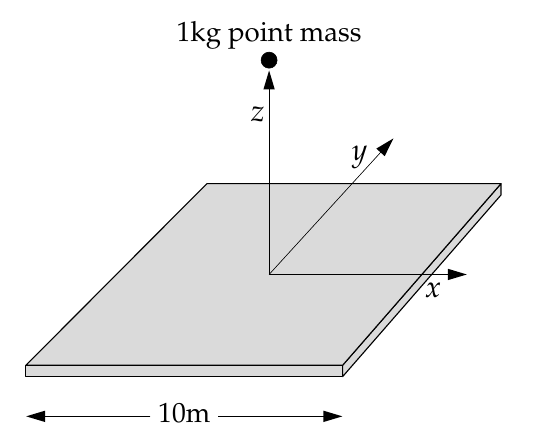

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


C:\Users\migue\AppData\Local\Temp\ipykernel_15652\2616537679.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  f=lambda x,y,zi: 1/((x**2 + y**2 + zi**2)**(3/2))
C:\Users\migue\AppData\Local\Temp\ipykernel_15652\2616537679.py:17: RuntimeWarning: invalid value encountered in scalar multiply
  fz=G*sigma*zi*integral


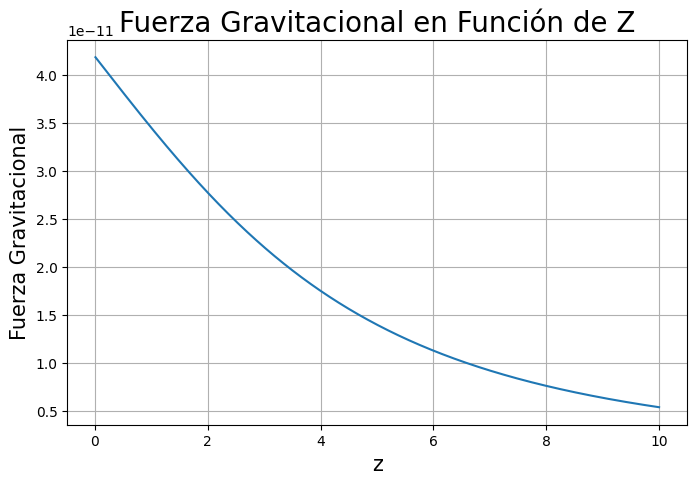

In [52]:
G= 6.674e-11 #constante gravitacional
l=10 #(metros) ~ longitud de la lámina
M=10 #(kg) ~ Masa de la lámina
m= 1 #(kg) ~ Masa puntual
sigma=M/(l**2) #Densidad superficial de masa
evaluacion_z=[] #lista donde se guardarán los valores que toma fz
z=np.linspace(0,10, 1000)
#ciclo for para iterar sobre z y integrar
for zi in z:
    a=-l/2
    b=l/2
    g=lambda y: -l/2
    h=lambda y: l/2
    #función a integrar
    f=lambda x,y,zi: 1/((x**2 + y**2 + zi**2)**(3/2))
    integral, error= dblquad(f,a,b,g,h,args=(zi,))
    fz=G*sigma*zi*integral
    evaluacion_z.append(fz)
#se hace la gráfica
plt.figure(figsize=(8,5))
plt.plot(z,evaluacion_z)
plt.title("Fuerza Gravitacional en Función de Z", fontsize=20)
plt.xlabel("z", fontsize=15)
plt.ylabel("Fuerza Gravitacional", fontsize=15)
plt.grid()
plt.show()